In [59]:
import numpy as np

In [60]:
x = LabelledOrderedTree([], label = 3)
print(x)

3[]


In [61]:
S = OrderedTrees(4);
S.list()

[[[], [], []], [[], [[]]], [[[]], []], [[[], []]], [[[[]]]]]

In [62]:
O=OrderedTrees().labelled_trees();O

Labelled ordered trees

In [63]:
L2 = LabelledOrderedTree([], label=2); L2

2[]

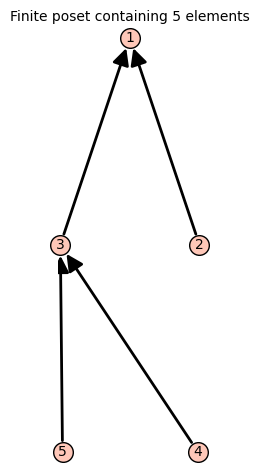

In [64]:
t = OrderedTree([[],[[],[]]]).canonical_labelling().to_poset(); t

In [65]:
T = BinaryTrees(3, full=True).random_element() 
print(T)

[[., .], [., .]]


[[., .], [[., .], [[., .], [., .]]]]


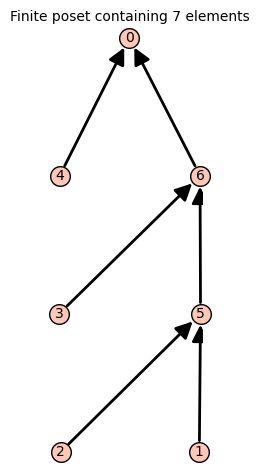

In [66]:
T = BinaryTrees(7, full=True)[0]
T1 = BinaryTrees(7, full=True)[2]
print(T)
P=T.to_poset()
P

False


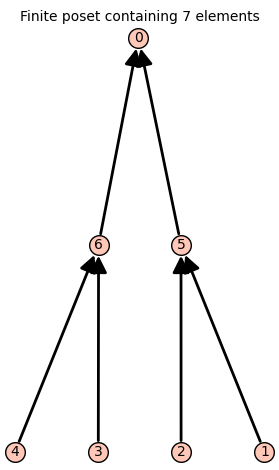

In [67]:
P1=T1.to_poset()
print(P.is_isomorphic(P1))
P1

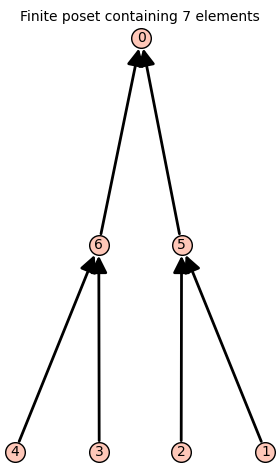

In [68]:
T = BinaryTrees(7, full=True).random_element() 
T.to_poset()

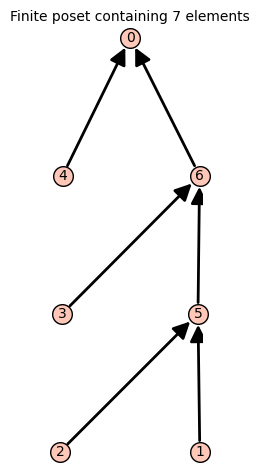

In [69]:
T = BinaryTrees(7, full=True).random_element()
T.to_poset()

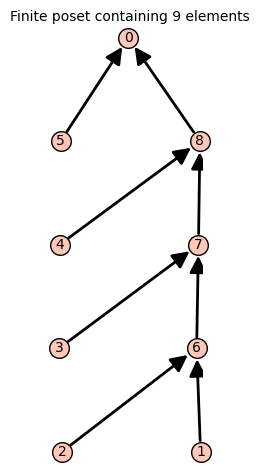

In [70]:
T1 = BinaryTrees(9, full=True)[0] ; T1.to_poset()

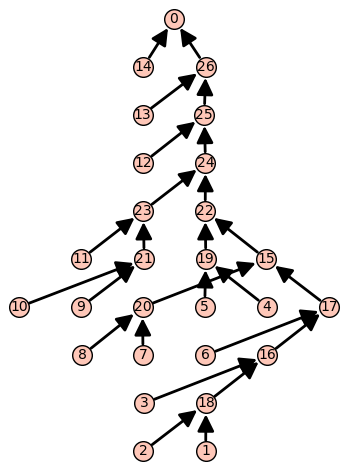

In [71]:
T2 = BinaryTrees(27, full=True)[7000]; T2.to_poset().plot()

In [72]:
els=T2.to_poset().order_filter([1,4,8,9]);els

[9, 21, 23, 8, 20, 4, 19, 1, 18, 16, 17, 15, 22, 24, 25, 26, 0]

In [73]:
S = list(set([1..26])-set(els));S

[2, 3, 5, 6, 7, 10, 11, 12, 13, 14]

In [74]:
m=T2.to_poset().join(1,T2.to_poset().join(8,9)); print(m)

24


In [75]:
T2.to_poset().closed_interval(1,8)

[]

In [76]:
T2 = BinaryTrees(11, full=True).list(); T2

[[[., .], [[., .], [[., .], [[., .], [[., .], [., .]]]]]],
 [[., .], [[., .], [[., .], [[[., .], [., .]], [., .]]]]],
 [[., .], [[., .], [[[., .], [., .]], [[., .], [., .]]]]],
 [[., .], [[., .], [[[., .], [[., .], [., .]]], [., .]]]],
 [[., .], [[., .], [[[[., .], [., .]], [., .]], [., .]]]],
 [[., .], [[[., .], [., .]], [[., .], [[., .], [., .]]]]],
 [[., .], [[[., .], [., .]], [[[., .], [., .]], [., .]]]],
 [[., .], [[[., .], [[., .], [., .]]], [[., .], [., .]]]],
 [[., .], [[[[., .], [., .]], [., .]], [[., .], [., .]]]],
 [[., .], [[[., .], [[., .], [[., .], [., .]]]], [., .]]],
 [[., .], [[[., .], [[[., .], [., .]], [., .]]], [., .]]],
 [[., .], [[[[., .], [., .]], [[., .], [., .]]], [., .]]],
 [[., .], [[[[., .], [[., .], [., .]]], [., .]], [., .]]],
 [[., .], [[[[[., .], [., .]], [., .]], [., .]], [., .]]],
 [[[., .], [., .]], [[., .], [[., .], [[., .], [., .]]]]],
 [[[., .], [., .]], [[., .], [[[., .], [., .]], [., .]]]],
 [[[., .], [., .]], [[[., .], [., .]], [[., .], [., .]]]

# Create a list of full binary trees on n leaves, for a given n

### The number of leaves for a full binary tree on n nodes is (n+1)/2

In [77]:
nodes = 11
Trees = BinaryTrees(nodes, full=True).list(); Trees

[[[., .], [[., .], [[., .], [[., .], [[., .], [., .]]]]]],
 [[., .], [[., .], [[., .], [[[., .], [., .]], [., .]]]]],
 [[., .], [[., .], [[[., .], [., .]], [[., .], [., .]]]]],
 [[., .], [[., .], [[[., .], [[., .], [., .]]], [., .]]]],
 [[., .], [[., .], [[[[., .], [., .]], [., .]], [., .]]]],
 [[., .], [[[., .], [., .]], [[., .], [[., .], [., .]]]]],
 [[., .], [[[., .], [., .]], [[[., .], [., .]], [., .]]]],
 [[., .], [[[., .], [[., .], [., .]]], [[., .], [., .]]]],
 [[., .], [[[[., .], [., .]], [., .]], [[., .], [., .]]]],
 [[., .], [[[., .], [[., .], [[., .], [., .]]]], [., .]]],
 [[., .], [[[., .], [[[., .], [., .]], [., .]]], [., .]]],
 [[., .], [[[[., .], [., .]], [[., .], [., .]]], [., .]]],
 [[., .], [[[[., .], [[., .], [., .]]], [., .]], [., .]]],
 [[., .], [[[[[., .], [., .]], [., .]], [., .]], [., .]]],
 [[[., .], [., .]], [[., .], [[., .], [[., .], [., .]]]]],
 [[[., .], [., .]], [[., .], [[[., .], [., .]], [., .]]]],
 [[[., .], [., .]], [[[., .], [., .]], [[., .], [., .]]]

# Find the DOAD set of a given node of a tree

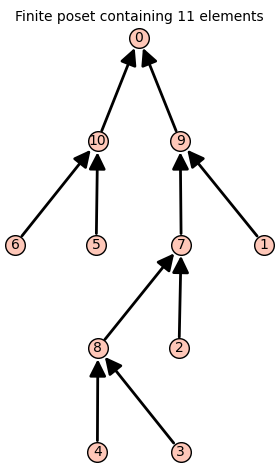

In [78]:
#Here we treat trees as finite posets.
tree = Trees[15]
treeposet = tree.to_poset(); treeposet

In [79]:
#Function which returns the leaves on the down set of a node
def downset(treeposet,node):
    leaves = (len(treeposet)+1)/2
    downs = treeposet.order_ideal([node])
    return list(set(downs).intersection(set([1..leaves])))

downset(treeposet,7)

[2, 3, 4]

In [80]:
#Function which returns the leaves on the upper set of a node
def antidownset(treeposet,node):
    leaves=(len(treeposet)+1)/2
    downs = downset(treeposet,node)
    return list(set([1..leaves])-set(downs))

antidownset(treeposet,7)

[1, 5, 6]

# Obtain the DOAD Sets of a given tree

In [81]:
#Returns the DOAD Sets of a tree sorted in 
def doad(treeposet):
    doadsets = []
    for i in range(len(treeposet)):
        doadsets.append(downset(treeposet,i))
        doadsets.append(antidownset(treeposet,i))
    return sorted(doadsets, key=len, reverse = True)

doad(treeposet)

[[1, 2, 3, 4, 5, 6],
 [2, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 2, 4, 5, 6],
 [1, 2, 3, 5, 6],
 [1, 2, 3, 4, 6],
 [1, 2, 3, 4, 5],
 [1, 2, 5, 6],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [2, 3, 4],
 [1, 5, 6],
 [3, 4],
 [5, 6],
 [5, 6],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 []]

In [82]:
#Returns only the antidescendant sets
def adsets(treeposet):
    adsets = []
    for i in range(len(treeposet)):
        #doadsets.append(downset(treeposet,i))
        adsets.append(antidownset(treeposet,i))
    return sorted(adsets, key=len, reverse = True)

adsets(treeposet)

[[2, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 2, 4, 5, 6],
 [1, 2, 3, 5, 6],
 [1, 2, 3, 4, 6],
 [1, 2, 3, 4, 5],
 [1, 2, 5, 6],
 [1, 2, 3, 4],
 [1, 5, 6],
 [5, 6],
 []]

In [83]:
#Returns only the descendant sets
def dsets(treeposet):
    dsets = []
    for i in range(len(treeposet)):
        #doadsets.append(downset(treeposet,i))
        dsets.append(downset(treeposet,i))
    return sorted(dsets, key=len, reverse = True)

dsets(treeposet)

[[1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4],
 [2, 3, 4],
 [3, 4],
 [5, 6],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6]]

In [84]:
#Sorts a list by length
d = sorted(doad(treeposet), key=len, reverse=True)
print(d)

[[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, 6], [1, 2, 3, 5, 6], [1, 2, 3, 4, 6], [1, 2, 3, 4, 5], [1, 2, 5, 6], [1, 2, 3, 4], [1, 2, 3, 4], [2, 3, 4], [1, 5, 6], [3, 4], [5, 6], [5, 6], [1], [2], [3], [4], [5], [6], []]


# Find the number of DOAD sets of a tree covering a given DOAD set S

In [85]:
#Assume we fix a set S
#Returns the function giving the minimum number of sets of DOAD sets of a tree to cover S

def covernumber(treeposet,S):
    initialS = set(S)
    S = set(S)
    covered=set([])
    covers = []
    
    doadsets = doad(treeposet)
    
    i=0
    while (covered != initialS) and (i < len(doadsets)-1):
        #print(doadsets[i])
        if set(doadsets[i]).issubset(S): 
            S = S.difference(set(doadsets[i]))
            #print("S=",doadsets[i])
            covers.append(doadsets[i])
            covered.union(set(doadsets[i]))
            #print("Covered=",covered)
        i+=1
    
    #print(covers)            
    return len(covers)
    
covernumber(treeposet,[1,2,5,6])

1

### Problem! This is an implementation of the greedy algorithm for covering set problems. It may happen that [2,3,4,5,6,7] is covered by [2],[3],[4,5,6,7] and also by [2,3,4],[5,6,7]. Because of the way the algorithm is constructed, this will return the answer 3 instead of the optimal 2.

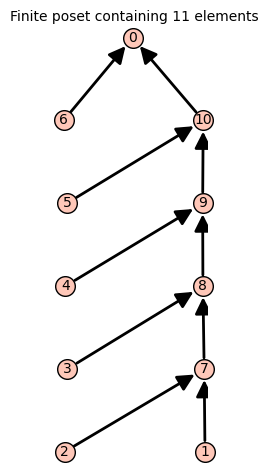

In [86]:
#Let us now work with two different trees
nodes = 11
Trees = BinaryTrees(nodes, full=True).list()

tree1 = Trees[1].to_poset()
tree1

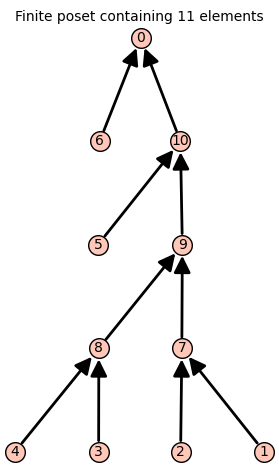

In [87]:
tree2 = Trees[11].to_poset()
tree2

In [88]:
#Fixing a node of the second tree, the function returns a covering number for either the down or antidown set
#Node is a node of tree2
def doadcovernumber(tree1,tree2,node):
    down = downset(tree2,node)
    antidown = antidownset(tree2,node)
    
    doadtree1 = doad(tree1)
    
    cdown = covernumber(tree1,down)
    cantidown = covernumber(tree1,antidown)
    
    return min(cdown,cantidown)

doadcovernumber(tree1,tree2,9)

1

In [89]:
#Iterates the previous function over all nodes of the second tree to obtain a c-exponent
def cexponent(tree1,tree2):
    doad1 = doad(tree1)
    doad2 = doad(tree2)
    cvalues=[]
    
    for i in range(len(tree2)):
        cvalues.append(doadcovernumber(tree1,tree2,i))
    
    #print("C values=",cvalues)
    return max(cvalues)

cexponent(tree1,tree2)        

2

In [90]:
cexponent(tree2,tree1)

2

# Exhaustively trying out all possibilities

In [91]:
import numpy as np

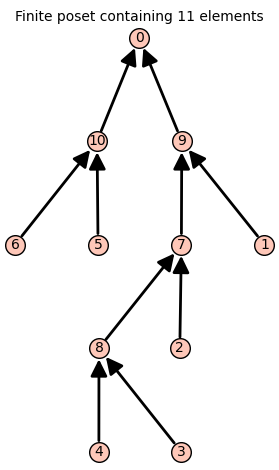

In [92]:
tree = Trees[15]
treeposet = tree.to_poset(); treeposet

In [93]:
#Assume we fix a set S
#Returns the function giving the number of sets of DOAD sets of a tree to cover S

def covernumberdoad(doadsets,S):
    initialS = set(S)
    S = set(S)
    covered=set([])
    covers = []
    
    i=0
    while (covered != initialS) and (i < len(doadsets)-1):
        #print(doadsets[i])
        if set(doadsets[i]).issubset(S): 
            S = S.difference(set(doadsets[i]))
            #print("S=",doadsets[i])
            covers.append(doadsets[i])
            covered.union(set(doadsets[i]))
            #print("Covered=",covered)
        i+=1
               
    return covers
    
covernumberdoad(doad(treeposet),[1,2,5,6])

[[1, 2, 5, 6]]

In [94]:
#Function that returns all possible coverings of S by DOAD Sets of treeposet by making the DOAD list smaller
#in each iteration

def exhcovernumber(treeposet,S):
    
    doadsets = doad(treeposet)
    leaves = (len(treeposet)+1)/2
    coverslist = []
    
    for j in range(len(doadsets)-leaves):
        
        coverslist.append(covernumberdoad(doadsets, S))
        doadsets = doadsets[1:]
                
    return coverslist
    
print(doad(treeposet))    
exhcovernumber(treeposet,[1,2,5,6])

[[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6], [1, 3, 4, 5, 6], [1, 2, 4, 5, 6], [1, 2, 3, 5, 6], [1, 2, 3, 4, 6], [1, 2, 3, 4, 5], [1, 2, 5, 6], [1, 2, 3, 4], [1, 2, 3, 4], [2, 3, 4], [1, 5, 6], [3, 4], [5, 6], [5, 6], [1], [2], [3], [4], [5], [6], []]


[[[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 2, 5, 6]],
 [[1, 5, 6], [2]],
 [[1, 5, 6], [2]],
 [[1, 5, 6], [2]],
 [[1, 5, 6], [2]],
 [[5, 6], [1], [2]],
 [[5, 6], [1], [2]],
 [[5, 6], [1], [2]],
 [[1], [2], [5], [6]]]

In [95]:
#Function that returns the minimum lenght of all the covers computed with the function above
def mincoverlength(treeposet,S):
    covers = []
    
    for i in range(len(exhcovernumber(treeposet,S))):
        covers.append(len(exhcovernumber(treeposet,S)[i]))
    
    return min(covers)

mincoverlength(treeposet,[3,4])

1

In [96]:
#Function that returns the minimum covering sets of S
def mincover(treeposet, S):
    covers = []
    minimalcover = []
    
    for i in range(len(exhcovernumber(treeposet,S))):
        covers.append(len(exhcovernumber(treeposet,S)[i]))
    
    minimum = min(covers)
    
    for j in range(len(covers)):
        if covers[j] == minimum:
            minimalcover = exhcovernumber(treeposet,S)[j]
            
    return minimalcover
 
mincover(treeposet,[3,4])

[[3, 4]]

In [97]:
#Fixing a node of the second tree, the function returns the best covering number for either the down or antidown set
#Node is a node of tree2
def exhdoadcovernumber(tree1,tree2,node):
    down = downset(tree2,node)
    antidown = antidownset(tree2,node)
    
    doadtree1 = doad(tree1)
    
    cdown = mincoverlength(tree1,down)
    cantidown = mincoverlength(tree1,antidown)
    
    return min(cdown,cantidown)

exhdoadcovernumber(tree1,tree2,9)

1

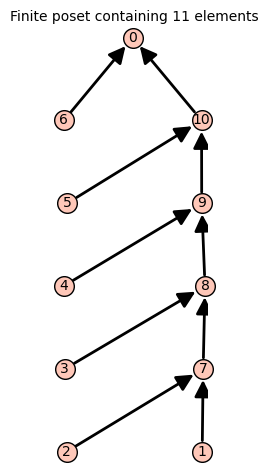

In [98]:
tree1

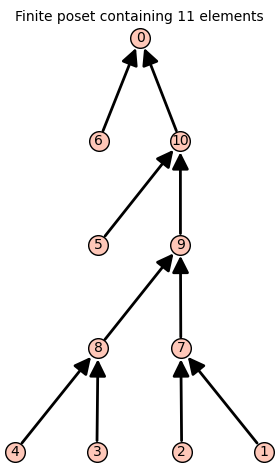

In [99]:
tree2

In [100]:
#Function that returns the containment exponent for a pair of trees
def exhcexponent(tree1,tree2):
    doad1 = doad(tree1)
    doad2 = doad(tree2)
    cvalues=[]
    
    for i in range(len(tree2)):
        cvalues.append(exhdoadcovernumber(tree1,tree2,i))
    
    #print("C values=",cvalues)
    return max(cvalues)

exhcexponent(tree1,tree2)        

2

# Applying both algorithms for obtaining all possible exponents for trees on 4 leaves

In [101]:
import numpy as np

## Exponents for trees on 4 leaves with greedy algorithm and exhaustive search algorithm

In [102]:
#Input the number of leaves of tree
#Returns the matrix exponent for trees with that many leaves which are not isomorphic

def matrixonleaves(leaves):
    nodes = 2*leaves-1
    TreesUnfiltered = BinaryTrees(nodes, full=True).list()       
    Trees = []
    posets = []
    for T in TreesUnfiltered:
        P = T.to_poset()
        # compare with previously seen representatives
        if not any(P.is_isomorphic(Q) for Q in posets):
            Trees.append(T)
            posets.append(P)
    exps = np.zeros((len(Trees), len(Trees)))
    for i in range(len(Trees)):
        for j in range(len(Trees)):
            tree1 = Trees[i].to_poset()
            tree2 = Trees[j].to_poset()
            exps[i][j] = cexponent(tree1,tree2)
    return exps

matrixonleaves(4)

array([[1., 1.],
       [1., 1.]])

In [104]:
#Returns the matrix of exponent for trees using the exhaustive search algorithm
def exhmatrixonleaves(leaves):
    nodes = 2*leaves-1
    
    TreesUnfiltered = BinaryTrees(nodes, full=True).list()       
    Trees = []
    posets = []
    for T in TreesUnfiltered:
        P = T.to_poset()
        # compare with previously seen representatives
        if not any(P.is_isomorphic(Q) for Q in posets):
            Trees.append(T)
            posets.append(P)
    exps = np.zeros((len(Trees), len(Trees)))
    
    for i in range(len(Trees)):
        for j in range(len(Trees)):
            tree1 = Trees[i].to_poset()
            tree2 = Trees[j].to_poset()
            exps[i][j] = exhcexponent(tree1,tree2)
    return exps
    
exhmatrixonleaves(4)

array([[1., 1.],
       [1., 1.]])

# Now we consider all trees on 5 leaves

In [105]:
matrixonleaves(5)

array([[1., 2., 2.],
       [2., 1., 2.],
       [2., 2., 1.]])

In [106]:
exhmatrixonleaves(5)

array([[1., 2., 2.],
       [2., 1., 2.],
       [2., 2., 1.]])

# Trees on 6 leaves

In [107]:
leaves6 = matrixonleaves(6)

In [108]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(leaves6)

[[1. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 1. 2.]
 [2. 2. 1. 2. 2. 3.]
 [2. 2. 2. 1. 2. 2.]
 [2. 1. 2. 2. 1. 2.]
 [2. 2. 2. 2. 2. 1.]]


In [109]:
print(leaves6.max())

3.0


In [110]:
exhleaves6 = exhmatrixonleaves(6)

In [111]:
#Bound of 6/2 = 3 is not achieved 
print(exhleaves6)

[[1. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 1. 2.]
 [2. 2. 1. 2. 2. 2.]
 [2. 2. 2. 1. 2. 2.]
 [2. 1. 2. 2. 1. 2.]
 [2. 2. 2. 2. 2. 1.]]


In [112]:
print(exhleaves6.max())

2.0


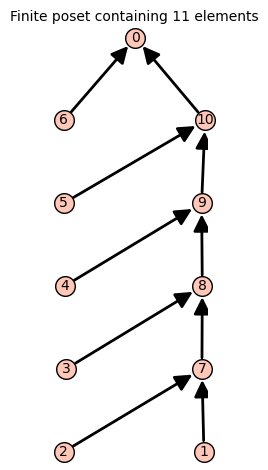

In [113]:
treelist = BinaryTrees(11, full=True).list()
treeex = treelist[0].to_poset()
treeex

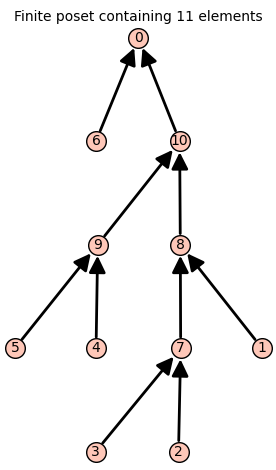

In [114]:
Trees[6].to_poset()

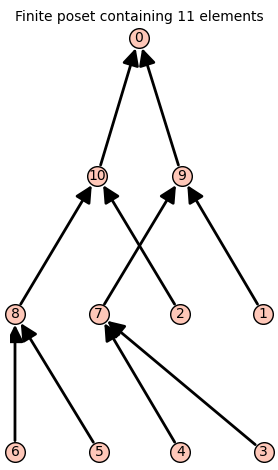

In [115]:
Trees[20].to_poset()

# Trees on 7 leaves

In [116]:
leaves7 = matrixonleaves(7)

In [118]:
print(leaves7)

[[1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 3. 2. 1. 2. 2. 2.]
 [2. 2. 1. 2. 2. 3. 2. 2. 2. 2. 2.]
 [2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 3. 2. 2. 2. 1.]
 [3. 2. 3. 2. 2. 1. 3. 2. 2. 3. 2.]
 [2. 2. 2. 2. 2. 3. 1. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 3. 2. 1. 2. 2. 2.]
 [2. 2. 2. 2. 2. 3. 2. 2. 1. 2. 2.]
 [2. 2. 2. 2. 2. 2. 3. 2. 3. 1. 2.]
 [2. 2. 2. 2. 1. 2. 3. 2. 2. 2. 1.]]


In [119]:
print(leaves7.max())

3.0


# Trees on 8 leaves

In [120]:
leaves8 = matrixonleaves(8)

In [121]:
print(leaves8)

[[1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 2. 2.]
 [2. 1. 2. 2. 2. 3. 2. 2. 2. 3. 2. 3. 1. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2.]
 [2. 2. 1. 2. 2. 3. 2. 2. 2. 3. 3. 3. 2. 2. 3. 2. 3. 2. 3. 2. 4. 3. 2.]
 [2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 3. 2. 2. 3. 2. 2.]
 [2. 2. 2. 2. 1. 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 1. 2. 3. 2. 2. 3. 2. 1.]
 [3. 2. 3. 2. 2. 1. 3. 2. 2. 3. 2. 2. 2. 3. 2. 2. 3. 3. 2. 2. 3. 2. 2.]
 [2. 2. 2. 2. 2. 3. 1. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 2. 4. 2. 2.]
 [2. 2. 2. 2. 2. 3. 2. 1. 2. 3. 2. 3. 2. 3. 3. 2. 2. 3. 2. 2. 3. 2. 2.]
 [2. 2. 2. 2. 2. 3. 2. 2. 1. 3. 2. 3. 2. 3. 2. 2. 2. 3. 2. 1. 3. 2. 2.]
 [3. 3. 3. 3. 2. 3. 4. 3. 3. 1. 2. 3. 3. 2. 3. 2. 3. 2. 2. 3. 3. 2. 2.]
 [2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 1. 3. 2. 3. 2. 2. 2. 2. 1. 2. 3. 1. 2.]
 [2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 3. 2. 2. 2. 4. 2. 2.]
 [2. 1. 2. 2. 2. 3. 2. 2. 2. 3. 2. 3. 1. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2.]
 [2. 2. 2. 3. 2. 3. 3. 2. 3. 2. 2. 2. 2. 1. 3. 2. 3. 2. 2. 3. 3.

In [122]:
print(leaves8.max())

4.0


In [123]:
leaves8

array([[1., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 2., 2., 2., 3., 2., 2.],
       [2., 1., 2., 2., 2., 3., 2., 2., 2., 3., 2., 3., 1., 2., 2., 2.,
        2., 3., 2., 2., 3., 2., 2.],
       [2., 2., 1., 2., 2., 3., 2., 2., 2., 3., 3., 3., 2., 2., 3., 2.,
        3., 2., 3., 2., 4., 3., 2.],
       [2., 2., 2., 1., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2.,
        3., 3., 2., 2., 3., 2., 2.],
       [2., 2., 2., 2., 1., 2., 3., 2., 2., 3., 2., 2., 2., 2., 2., 1.,
        2., 3., 2., 2., 3., 2., 1.],
       [3., 2., 3., 2., 2., 1., 3., 2., 2., 3., 2., 2., 2., 3., 2., 2.,
        3., 3., 2., 2., 3., 2., 2.],
       [2., 2., 2., 2., 2., 3., 1., 2., 2., 2., 2., 2., 2., 3., 2., 2.,
        3., 2., 2., 2., 4., 2., 2.],
       [2., 2., 2., 2., 2., 3., 2., 1., 2., 3., 2., 3., 2., 3., 3., 2.,
        2., 3., 2., 2., 3., 2., 2.],
       [2., 2., 2., 2., 2., 3., 2., 2., 1., 3., 2., 3., 2., 3., 2., 2.,
        2., 3., 2., 1., 3., 2., 2.],
       [3., 3., 3.,

# Trees on 9 leaves

In [127]:
leaves9 = matrixonleaves(9)

In [128]:
print(leaves9)

[[1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 4. 2. 2. 2.
  2. 3. 2. 2. 3. 2. 2. 3. 3. 2. 2. 3. 2. 2. 2. 3. 3. 2. 2. 2. 2. 2.]
 [2. 1. 2. 2. 2. 3. 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 3.
  2. 3. 2. 2. 2. 3. 2. 3. 3. 2. 3. 3. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2.]
 [2. 2. 1. 2. 2. 3. 2. 2. 2. 3. 3. 3. 2. 2. 3. 2. 3. 2. 3. 2. 4. 3. 3. 3.
  3. 2. 2. 2. 3. 3. 3. 2. 3. 3. 2. 3. 2. 3. 2. 3. 3. 3. 2. 3. 3. 2.]
 [2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 4. 2. 3. 3. 2. 2. 3.
  2. 3. 3. 2. 3. 3. 2. 3. 3. 2. 4. 2. 3. 2. 2. 3. 4. 2. 3. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3. 3. 2. 2. 3.
  2. 3. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 3. 2. 2. 2. 3. 2. 3. 2. 2. 2.]
 [3. 2. 3. 2. 2. 1. 3. 2. 2. 3. 2. 2. 2. 3. 2. 2. 3. 4. 3. 3. 3. 3. 3. 3.
  2. 3. 3. 2. 3. 3. 2. 3. 3. 2. 4. 2. 3. 2. 2. 3. 4. 3. 3. 3. 3. 2.]
 [2. 2. 2. 2. 2. 3. 1. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 3. 3. 2. 4. 3. 3. 2.
  3. 2. 2. 2. 3. 2. 3. 2. 3. 2. 3. 3. 2. 2. 2. 3. 3. 3. 2. 3. 3. 2.]

In [129]:
print(leaves9.max())

4.0


# Trees on 10 leaves

In [130]:
leaves10 = matrixonleaves(10)

In [132]:
print(leaves10)

[[1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 4. 2. 2. 2.
  2. 3. 2. 2. 3. 2. 2. 3. 3. 2. 2. 3. 4. 2. 2. 3. 3. 2. 2. 2. 2. 2. 2. 3.
  4. 3. 3. 3. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 2. 2. 4. 2. 2. 2. 3. 2.
  2. 3. 3. 2. 2. 3. 3. 2. 4. 2. 2. 2. 3. 3. 2. 2. 2. 2. 2. 3. 5. 2. 2. 2.
  2. 4.]
 [2. 1. 2. 2. 2. 3. 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 3.
  2. 3. 2. 2. 2. 3. 2. 3. 3. 2. 3. 3. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 3. 3.
  3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 3. 4. 3. 3. 2. 4. 2. 3. 4. 2. 2. 3. 3. 3.
  3. 3. 2. 3. 2. 3. 3. 2. 4. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 5. 2. 2. 2.
  2. 4.]
 [2. 2. 1. 2. 2. 3. 2. 2. 2. 3. 3. 3. 2. 2. 3. 2. 3. 2. 3. 2. 4. 3. 3. 3.
  3. 2. 2. 2. 3. 3. 3. 2. 3. 3. 2. 4. 3. 3. 2. 3. 4. 3. 2. 3. 3. 3. 3. 3.
  3. 2. 3. 3. 2. 2. 2. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2. 4. 3. 3. 2. 4. 2.
  2. 4. 3. 3. 3. 2. 3. 3. 3. 3. 2. 3. 4. 3. 3. 3. 3. 3. 3. 3. 5. 3. 2. 3.
  3. 5.]
 [2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 3. 4. 2. 3. 3. 2. 2. 3.
  2. 3. 3. 

In [133]:
print(leaves10.max())

5.0
